# With PyDAP



In [1]:
from pydap.client import open_url
import matplotlib.pyplot as plt
dataset = open_url("http://gamone.whoi.edu/thredds/dodsC/usgs/data0/bathy/ETOPO2v2c_f4.nc")
import pprint
pprint.pprint( dataset.keys() )

KeysView(<DatasetType with children 'x', 'y', 'z'>)


In [2]:
z = dataset['z']
print(z.shape)

(5400, 10800)


In [3]:
ilon_low = int((10800. / 360) * (-30. + 180))
ilon_hi = int((10800. / 360) * (0. + 180))

ilat_low = int((5400. / 180) * (40 + 90))
ilat_hi = int((5400. / 180) * (60 + 90))

# Get data
point = z[ilat_low:ilat_hi,
          ilon_low:ilon_hi]

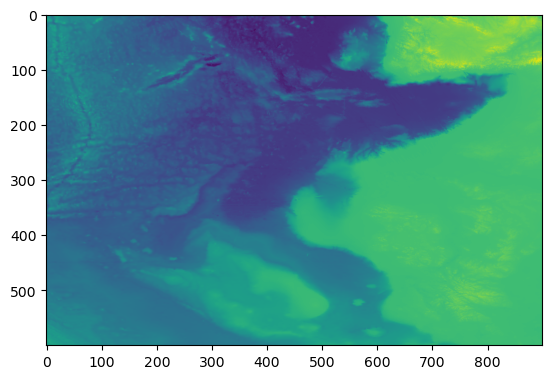

In [4]:
z = point.data[0]
plt.imshow(z)

# Xarray and Opendap 

In [5]:
import xarray

In [6]:
bathy = xarray.open_dataset("http://gamone.whoi.edu/thredds/dodsC/usgs/data0/bathy/ETOPO2v2c_f4.nc")
bathy

<xarray.Dataset>
Dimensions:  (x: 10800, y: 5400)
Coordinates:
  * x        (x) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 179.9 180.0
  * y        (y) float32 -89.98 -89.95 -89.92 -89.88 ... 89.88 89.92 89.95 89.98
Data variables:
    z        (y, x) float32 ...
Attributes:
    Conventions:  COARDS
    title:        
    source:                               -Rd -I2m -ZTLf                     ...
    node_offset:  1

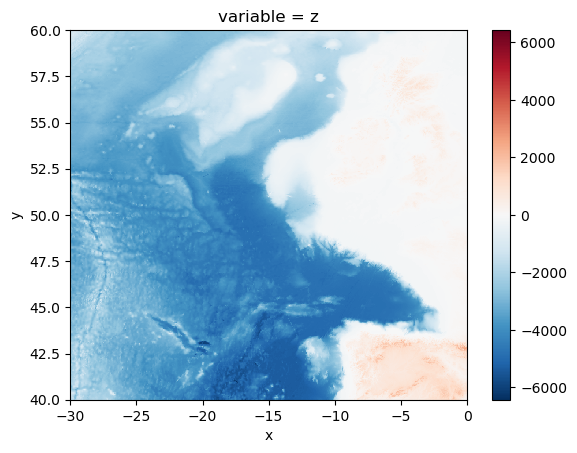

In [7]:
bathy.sel(y=slice(40, 60), x=slice(-30, 0)).to_array().plot()